<a href="https://colab.research.google.com/github/kenextra/IBM-MLCert/blob/main/Specialized_Models_Time_Series_and_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specialized Models: Time Series and Survival Analysis

### Sections required in your report:

1. Main objective of the analysis that also specifies whether your model will be focused on a specific type of Time Series, Survival Anlaysis, or Deep Learning and the benefits that your analysis brings to the business or stakeholders of this data.

2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
    
3. Brief summary of data exploration and actions taken for data cleaning or feature engineering.
    
4. Summary of training at least three variations of the Time Series, Survival Analysis, or Deep Learning model you selected. For example, you can use different models or different hyperparameters.
    
5. A paragraph explaining which of your models you recommend as a final model that best fits your needs in terms of accuracy or explainability.
    
6. Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

### The grading will center around 5 main points:

1. Does the report include a section describing the data?
    
2. Does the report include a paragraph detailing the main objective(s) of this analysis?  
    
3. Does the report include a section with variations of a Time Series, Survival Analysis, or Deep Learning model and specifies which one is the model that best suits the main objective(s) of this analysis?
    
4. Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
    
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques?

# General Section

In [ ]:
%%bash
pip install --upgrade pandas --quiet
pip install --upgrade scikit-learn --quiet
pip install --upgrade pyproj --quiet
pip install --upgrade statsmodels --quiet
pip install --upgrade pmdarima --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


## Import Libraries

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
# from collections import OrderedDict
from matplotlib.gridspec import GridSpec
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import fbprophet
import scipy as sp
pd.__version__

'1.3.2'

In [ ]:
import os
from pathlib import Path
IMAGES_PATH = Path.cwd() / 'images'

In [ ]:
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load, Explore and visualize data

In [ ]:
DATA_DIR = Path.cwd()

In [ ]:
pickup_locations = pd.read_csv(DATA_DIR / "pickupLocations.csv")
pickup_locations

,Names,Lat1,Lat2,Lon1,Lon2
0,Manhattan,40.7485,40.7576,-73.9955,-73.9773
1,LaGuardia,40.7660,40.7760,-73.8760,-73.8610
2,JFK,40.6390,40.6500,-73.7930,-73.7750


In [ ]:
taxi_pickups = pd.read_csv(DATA_DIR / "taxiPickups.csv", parse_dates=['PickupTime'])
taxi_pickups.head()

,PickupTime,Location,TripCount
0,2015-01-01 00:00:00,Manhattan,22
1,2015-01-01 00:00:00,LaGuardia,2
2,2015-01-01 00:00:00,JFK,2
3,2015-01-01 01:00:00,Manhattan,10
4,2015-01-01 01:00:00,LaGuardia,0


In [ ]:
taxi_pickups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PickupTime  26217 non-null  datetime64[ns]
 1   Location    26217 non-null  object        
 2   TripCount   26217 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 614.6+ KB


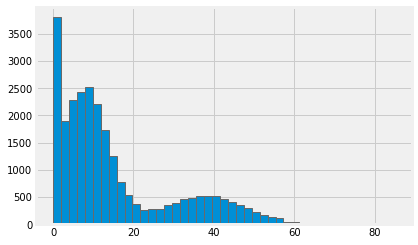

In [ ]:
_ = taxi_pickups.TripCount.hist(bins=43)

Saving figure jfk


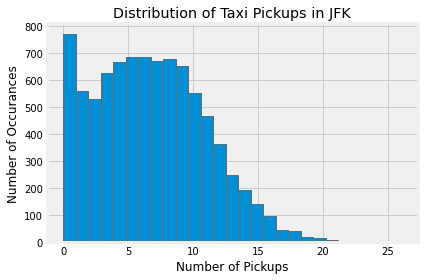

In [ ]:
loc = 'JFK'
_ = taxi_pickups[taxi_pickups.Location==loc].TripCount.hist(bins=27)
plt.xlabel('Number of Pickups')
plt.ylabel('Number of Occurances')
_ = plt.title('Distribution of Taxi Pickups in JFK')
save_fig('jfk')

Saving figure LaGuardia


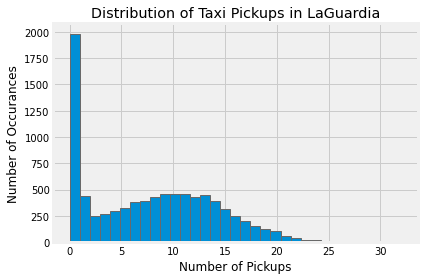

In [ ]:
loc = 'LaGuardia'
_ = taxi_pickups[taxi_pickups.Location==loc].TripCount.hist(bins=33)
plt.xlabel('Number of Pickups')
plt.ylabel('Number of Occurances')
_ = plt.title('Distribution of Taxi Pickups in LaGuardia')
save_fig('LaGuardia')

Saving figure Manhattan


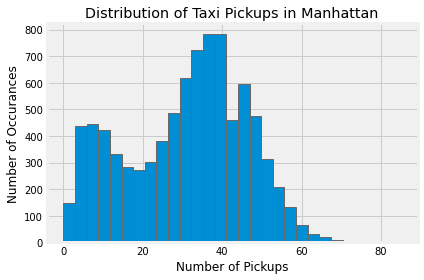

In [ ]:
loc = 'Manhattan'
_ = taxi_pickups[taxi_pickups.Location==loc].TripCount.hist(bins=29)
plt.xlabel('Number of Pickups')
plt.ylabel('Number of Occurances')
_ = plt.title('Distribution of Taxi Pickups in Manhattan')
save_fig('Manhattan')

Saving figure jLaMan


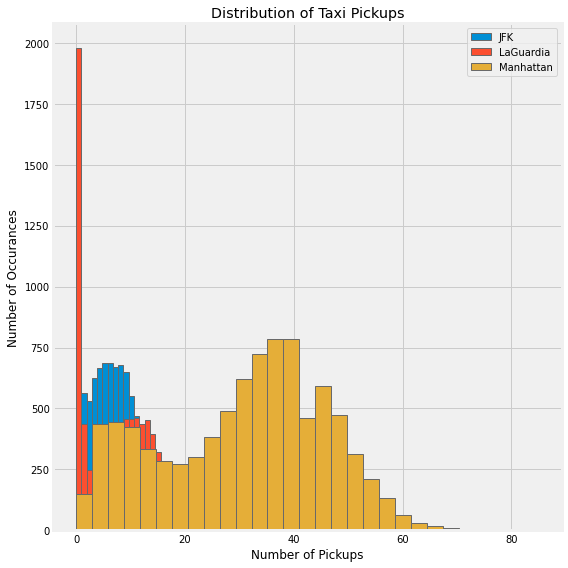

In [ ]:
loc1 = 'JFK'
loc2 = 'LaGuardia'
loc3 = 'Manhattan'
plt.figure(figsize=(8, 8))
_ = taxi_pickups[taxi_pickups.Location==loc1].TripCount.hist(bins=27)
_ = taxi_pickups[taxi_pickups.Location==loc2].TripCount.hist(bins=33)
_ = taxi_pickups[taxi_pickups.Location==loc3].TripCount.hist(bins=29)
_ = plt.legend([loc1, loc2, loc3])
plt.xlabel('Number of Pickups')
plt.ylabel('Number of Occurances')
_ = plt.title('Distribution of Taxi Pickups')
save_fig('jLaMan')

In [ ]:
taxi_pickups.describe(datetime_is_numeric=True)

,PickupTime,TripCount
count,26217,26217.000000
mean,2015-07-02 15:15:26.467559424,14.988328
min,2015-01-01 00:00:00,0.000000
25%,2015-04-02 12:00:00,4.000000
50%,2015-07-02 16:00:00,10.000000
75%,2015-10-01 19:00:00,21.000000
max,2015-12-31 23:00:00,85.000000
std,NaN,14.893112


In [ ]:
taxi_pickups.Location.value_counts()

Manhattan    8739
LaGuardia    8739
JFK          8739
Name: Location, dtype: int64

In [ ]:
# groupby().agg({'airline': 'size', 'taxi_out_diff': 'median'})
summary = taxi_pickups.groupby(by='Location', as_index=False,
                               sort=False, dropna=False
                               )['TripCount'].agg({'size', 'min', 'max', 'mean', 'median'}) # .reset_index()
summary.reset_index()

,Location,max,size,mean,min,median
0,Manhattan,85,8739,30.810161,0,33.0
1,LaGuardia,32,8739,7.635771,0,8.0
2,JFK,26,8739,6.519053,0,6.0


# Prepare data for ML

In [ ]:
data = taxi_pickups.copy(deep=True)
data.set_index('PickupTime', drop=False, inplace=True)
data.head()

,PickupTime,Location,TripCount
PickupTime,,,
2015-01-01 00:00:00,2015-01-01 00:00:00,Manhattan,22
2015-01-01 00:00:00,2015-01-01 00:00:00,LaGuardia,2
2015-01-01 00:00:00,2015-01-01 00:00:00,JFK,2
2015-01-01 01:00:00,2015-01-01 01:00:00,Manhattan,10
2015-01-01 01:00:00,2015-01-01 01:00:00,LaGuardia,0


In [ ]:
hourly = data.resample('H').sum()

In [ ]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TripCount  8760 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


In [ ]:
hourly.head()

,TripCount
PickupTime,
2015-01-01 00:00:00,26
2015-01-01 01:00:00,12
2015-01-01 02:00:00,14
2015-01-01 03:00:00,9
2015-01-01 04:00:00,11


In [ ]:
hourly.index.min(), hourly.index.max()

(Timestamp('2015-01-01 00:00:00', freq='H'),
 Timestamp('2015-12-31 23:00:00', freq='H'))

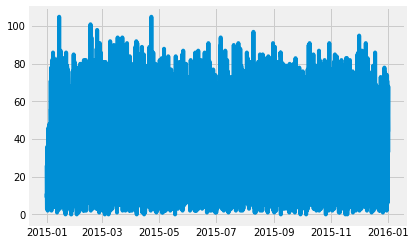

In [ ]:
_ = plt.plot(hourly.TripCount)

Saving figure taxi_pickups


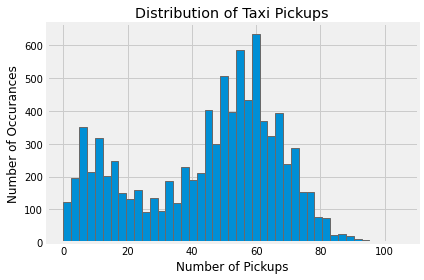

In [ ]:
_ = hourly.TripCount.hist(bins=43)
plt.xlabel('Number of Pickups')
plt.ylabel('Number of Occurances')
_ = plt.title('Distribution of Taxi Pickups')
save_fig('taxi_pickups')

# Facebook Prophet

In [ ]:
from fbprophet import Prophet
import tensorflow as tf

In [ ]:
df = hourly.copy(deep=True)

In [ ]:
df.shape

(8760, 1)

In [ ]:
df.head()

,TripCount
PickupTime,
2015-01-01 00:00:00,26
2015-01-01 01:00:00,12
2015-01-01 02:00:00,14
2015-01-01 03:00:00,9
2015-01-01 04:00:00,11


In [ ]:
# df.reset_index(inplace=True, drop=False)
df['ds'] = df.index
df.columns = ['y', 'ds']

In [ ]:
df = df[['ds', 'y']]

In [ ]:
df.head()

,ds,y
PickupTime,,
2015-01-01 00:00:00,2015-01-01 00:00:00,26
2015-01-01 01:00:00,2015-01-01 01:00:00,12
2015-01-01 02:00:00,2015-01-01 02:00:00,14
2015-01-01 03:00:00,2015-01-01 03:00:00,9
2015-01-01 04:00:00,2015-01-01 04:00:00,11


In [ ]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
# create a training set and a test set.
# We are only going to use last 60 hours to make everything a bit more clear
df_train = df[:'2015-12-29 11:00:00']
df_test = df['2015-12-29 12:00:00':]
print(df_train.tail())
print(df_test.head())

                                     ds   y
PickupTime                                 
2015-12-29 07:00:00 2015-12-29 07:00:00  42
2015-12-29 08:00:00 2015-12-29 08:00:00  36
2015-12-29 09:00:00 2015-12-29 09:00:00  48
2015-12-29 10:00:00 2015-12-29 10:00:00  45
2015-12-29 11:00:00 2015-12-29 11:00:00  57
                                     ds   y
PickupTime                                 
2015-12-29 12:00:00 2015-12-29 12:00:00  63
2015-12-29 13:00:00 2015-12-29 13:00:00  70
2015-12-29 14:00:00 2015-12-29 14:00:00  69
2015-12-29 15:00:00 2015-12-29 15:00:00  68
2015-12-29 16:00:00 2015-12-29 16:00:00  51


In [ ]:
df_train.shape, df_test.shape

((8700, 2), (60, 2))

## First Prophet model

In [ ]:
# m = Prophet(daily_seasonality=25)
m = Prophet()
m.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=df_test.shape[0], freq='h') # could also leave default freq of days and do 31 for period
print(future.head())
future.tail()

                   ds
0 2015-01-01 00:00:00
1 2015-01-01 01:00:00
2 2015-01-01 02:00:00
3 2015-01-01 03:00:00
4 2015-01-01 04:00:00


,ds
8755,2015-12-31 19:00:00
8756,2015-12-31 20:00:00
8757,2015-12-31 21:00:00
8758,2015-12-31 22:00:00
8759,2015-12-31 23:00:00


In [ ]:
# populate forecast
forecast = m.predict(future)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
8755,2015-12-31 19:00:00,61.575747,47.451884,76.065741
8756,2015-12-31 20:00:00,64.923734,52.742743,80.323051
8757,2015-12-31 21:00:00,64.547597,49.770706,78.875676
8758,2015-12-31 22:00:00,59.520186,44.945902,73.699752
8759,2015-12-31 23:00:00,49.826035,35.546860,63.207164


<Figure size 1080x576 with 0 Axes>

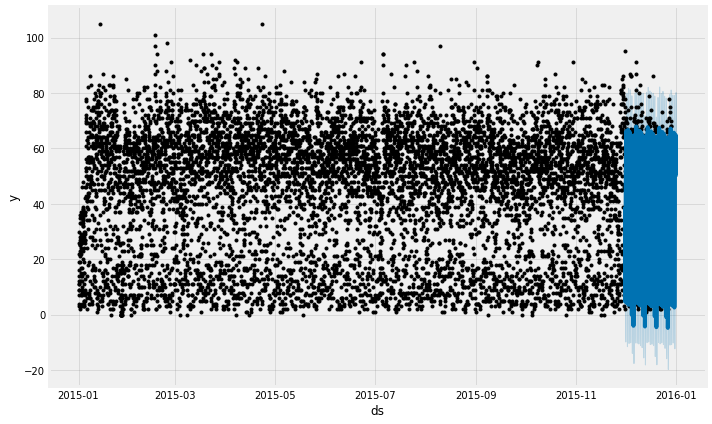

In [ ]:
_ = plt.figure(figsize=(15, 8))
m.plot(forecast[forecast.ds >= '2015-12-01']);
# plt.plot(df_test.y,'r')

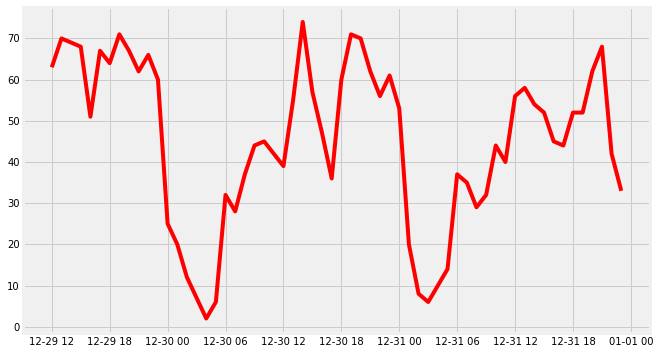

In [ ]:
_ = plt.figure(figsize=(10, 6))
plt.plot(df_test.ds, df_test.y, 'r')

In [ ]:
df_test.index.min(), df_test.index.max()

(Timestamp('2015-12-29 12:00:00', freq='H'),
 Timestamp('2015-12-31 23:00:00', freq='H'))

Saving figure fb1


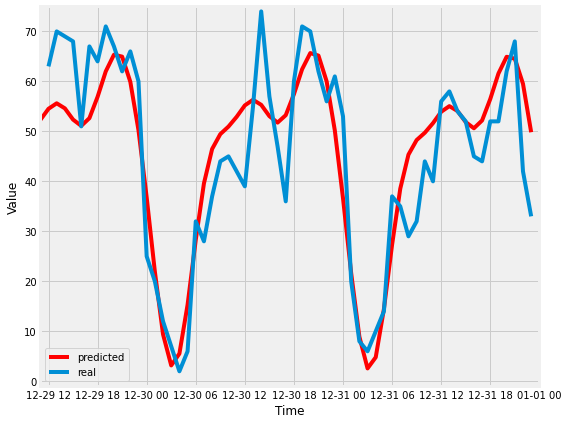

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot(forecast.ds, forecast.yhat, 'r')
ax = fig.gca()
# setting x limit. date range to plot
ax.set_xlim(pd.to_datetime(['2015-12-29 11:00:00', '2016-01-01']))
# ax.set_xlim(df_test.index.min(), df_test.index.max())
# we can ignore the shadow part by setting y limit
ax.set_ylim([-1, 75])
ax.set_ylabel('Value')
ax.set_xlabel('Time')
plt.plot(df_test.ds, df_test.y,)
ax.legend(['predicted', 'real'])
save_fig('fb1')

In [ ]:
tf.keras.metrics.mean_absolute_error(df_test.y.values.ravel(), forecast.yhat.values.ravel()[-60:]).numpy()

7.411312912790341

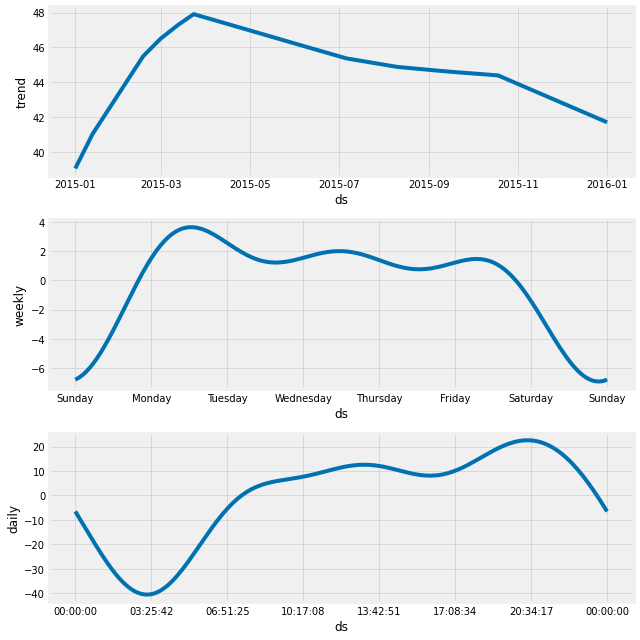

In [ ]:
m.plot_components(forecast);

## Second Prophet Model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


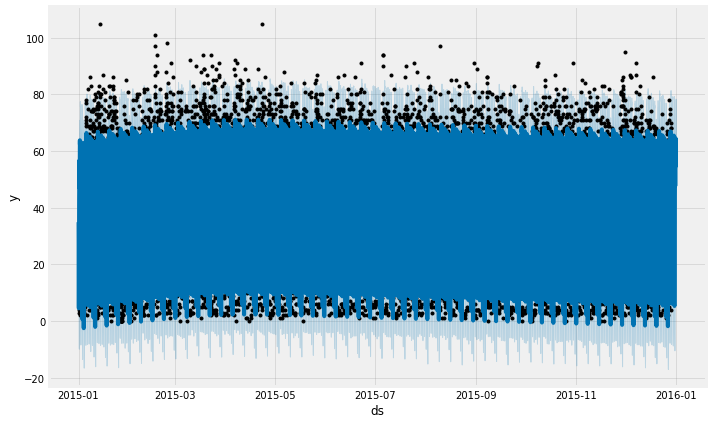

In [ ]:
# Decreasted drastically from defaults
changepoint_prior_scale = 0.005  # 0.5
seasonality_prior_scale = 24  # 10


m = Prophet(daily_seasonality=24,
            
            seasonality_prior_scale=seasonality_prior_scale,
            changepoint_prior_scale=changepoint_prior_scale)
m.fit(df_train);


forecast = m.predict(future)
m.plot(forecast);
# plt.plot(df_test.y,'r--')

Saving figure fb2


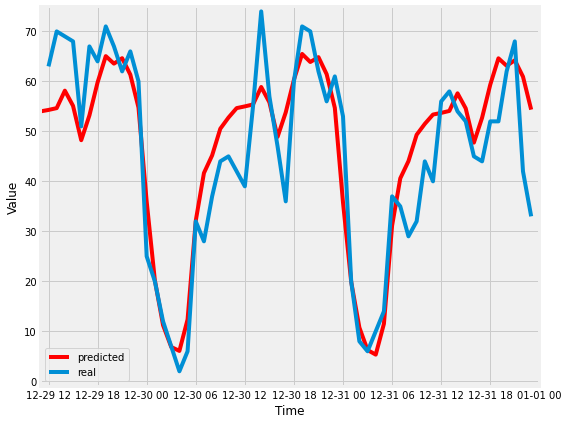

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot(forecast.ds, forecast.yhat, 'r')
ax = fig.gca()
# setting x limit. date range to plot
ax.set_xlim(pd.to_datetime(['2015-12-29 11:00:00', '2016-01-01']))
# ax.set_xlim(df_test.index.min(), df_test.index.max())
# we can ignore the shadow part by setting y limit
ax.set_ylim([-1, 75])
ax.set_ylabel('Value')
ax.set_xlabel('Time')
plt.plot(df_test.ds, df_test.y, )
ax.legend(['predicted', 'real'])
save_fig('fb2')

In [ ]:
tf.keras.metrics.mean_absolute_error(df_test.y.values.ravel(), forecast.yhat.values.ravel()[-60:]).numpy()

7.035844238819283

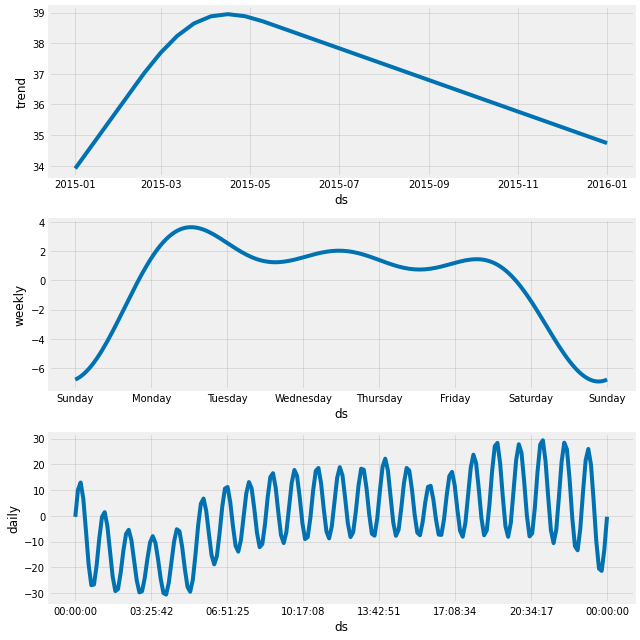

In [ ]:
m.plot_components(forecast);

# Deep Learning

## Load Data and helper functions

In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.6.0


In [ ]:
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
df = hourly.resample('H').sum()

In [ ]:
df.head()

,TripCount
PickupTime,
2015-01-01 00:00:00,26
2015-01-01 01:00:00,12
2015-01-01 02:00:00,14
2015-01-01 03:00:00,9
2015-01-01 04:00:00,11


In [ ]:
df.shape

(8760, 1)

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series2 = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series2)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    series2 = series.copy()
    ds = tf.data.Dataset.from_tensor_slices(series2)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast

Training data size: (8700,)
Validation size: (60,)


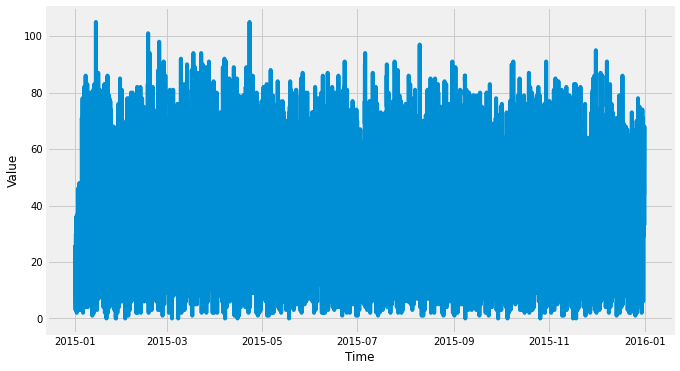

In [ ]:
series = df.TripCount.values
time = df.index.values
plt.figure(figsize=(10, 6))
plot_series(time, series)

split_time = 8700
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
print(f'Training data size: {x_train.shape}')
print(f'Validation size: {x_valid.shape}')

window_size = 72
batch_size = 128
shuffle_buffer_size = 1000

## Sequential model FC

### First model

In [ ]:
# First model
K.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                           input_shape=[None]),
                                    tf.keras.layers.Lambda(lambda x: tf.math.log1p(x)), 
                                    tf.keras.layers.Dense(20, activation="relu"), 
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: tf.math.expm1(x)),

                                    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
lambda_1 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
dense (Dense)                (None, None, 20)          40        
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          210       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda_2 (Lambda)            (None, None, 1)           0         
Total params: 261
Trainable params: 261
Non-trainable params: 0
__________________________________________________________

/content/images


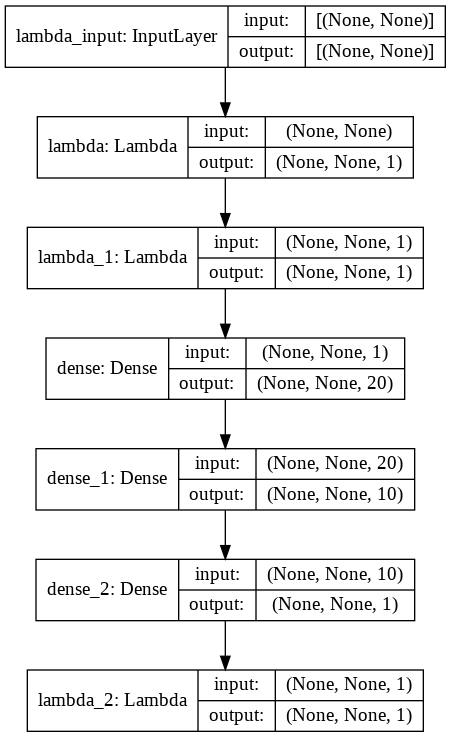

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/fc1.png"
plot_model(model, to_file=to_file, show_shapes=True,)

In [ ]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["mae"])
model.fit(dataset, epochs=20, verbose=1, batch_size=batch_size)

Epoch 1/20
68/68 [==============================] - 4s 15ms/step - loss: 28.5840 - mae: 29.0784
Epoch 2/20
68/68 [==============================] - 1s 16ms/step - loss: 9.5425 - mae: 10.0308
Epoch 3/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4702 - mae: 9.9584
Epoch 4/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4635 - mae: 9.9522
Epoch 5/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4554 - mae: 9.9445
Epoch 6/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4473 - mae: 9.9369
Epoch 7/20
68/68 [==============================] - 1s 15ms/step - loss: 9.4389 - mae: 9.9288
Epoch 8/20
68/68 [==============================] - 1s 15ms/step - loss: 9.4327 - mae: 9.9227
Epoch 9/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4262 - mae: 9.9163
Epoch 10/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4207 - mae: 9.9108
Epoch 11/20
68/68 [==============================] - 1s 

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size, batch_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]
rnn_forecast.shape

(60,)

Saving figure model_fc1


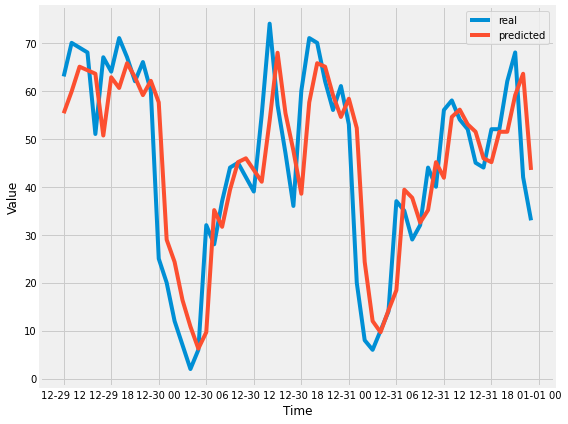

In [ ]:
plt.figure(figsize=(8, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.legend(['real', 'predicted'])
save_fig('model_fc1')

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

8.477009

### second model

In [ ]:
# Second model
K.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
K.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                           input_shape=[None]),
                                    tf.keras.layers.Lambda(lambda x: tf.math.log1p(x)),
                                    tf.keras.layers.Dense(60, activation="relu"),
                                    tf.keras.layers.Dense(20, activation="relu"), 
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: tf.math.expm1(x)),
                                    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
lambda_1 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
dense (Dense)                (None, None, 60)          120       
_________________________________________________________________
dense_1 (Dense)              (None, None, 20)          1220      
_________________________________________________________________
dense_2 (Dense)              (None, None, 10)          210       
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda_2 (Lambda)            (None, None, 1)           0

/content/images


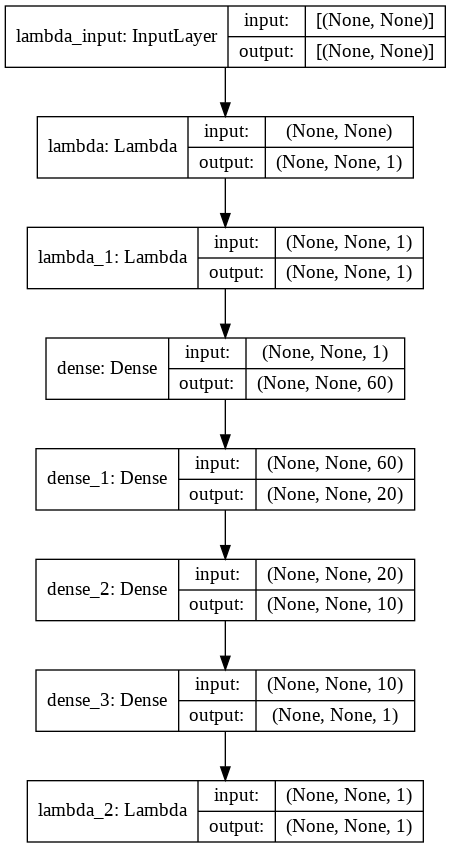

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/fc2.png"
plot_model(model, to_file=to_file, show_shapes=True,)

In [ ]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3,),
              metrics=["mae"])
model.fit(dataset, epochs=20, verbose=1, batch_size=batch_size)

Epoch 1/20
68/68 [==============================] - 2s 16ms/step - loss: 42.7711 - mae: 43.2695
Epoch 2/20
68/68 [==============================] - 1s 17ms/step - loss: 11.9297 - mae: 12.4199
Epoch 3/20
68/68 [==============================] - 1s 17ms/step - loss: 9.4454 - mae: 9.9349
Epoch 4/20
68/68 [==============================] - 1s 17ms/step - loss: 9.4437 - mae: 9.9330
Epoch 5/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4392 - mae: 9.9287
Epoch 6/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4351 - mae: 9.9247
Epoch 7/20
68/68 [==============================] - 1s 17ms/step - loss: 9.4333 - mae: 9.9230
Epoch 8/20
68/68 [==============================] - 1s 17ms/step - loss: 9.4274 - mae: 9.9174
Epoch 9/20
68/68 [==============================] - 1s 16ms/step - loss: 9.4233 - mae: 9.9135
Epoch 10/20
68/68 [==============================] - 1s 17ms/step - loss: 9.4209 - mae: 9.9114
Epoch 11/20
68/68 [==============================] - 1s

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size, batch_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Saving figure model_fc2


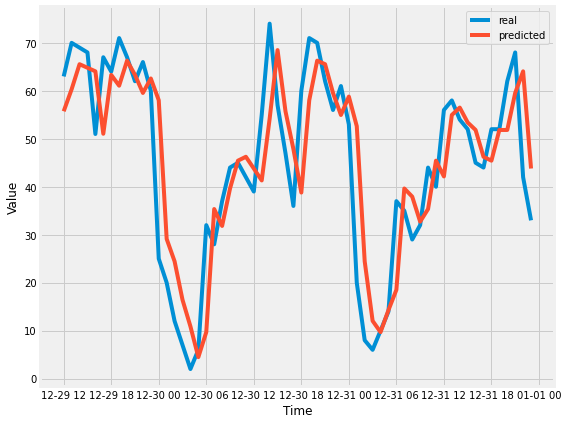

In [ ]:
plt.figure(figsize=(8, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.legend(['real', 'predicted'])
save_fig('model_fc2')

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

8.507609

## Simple RNN + Dense

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                           input_shape=[None]),
                                    tf.keras.layers.Lambda(lambda x: tf.math.log1p(x)),
                                    tf.keras.layers.SimpleRNN(60, return_sequences=True),
                                    tf.keras.layers.SimpleRNN(60, return_sequences=True),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: tf.math.expm1(x)),
                                    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
lambda_1 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 60)          3720      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 60)          7260      
_________________________________________________________________
dense (Dense)                (None, None, 10)          610       
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda_2 (Lambda)            (None, None, 1)           0

/content/images


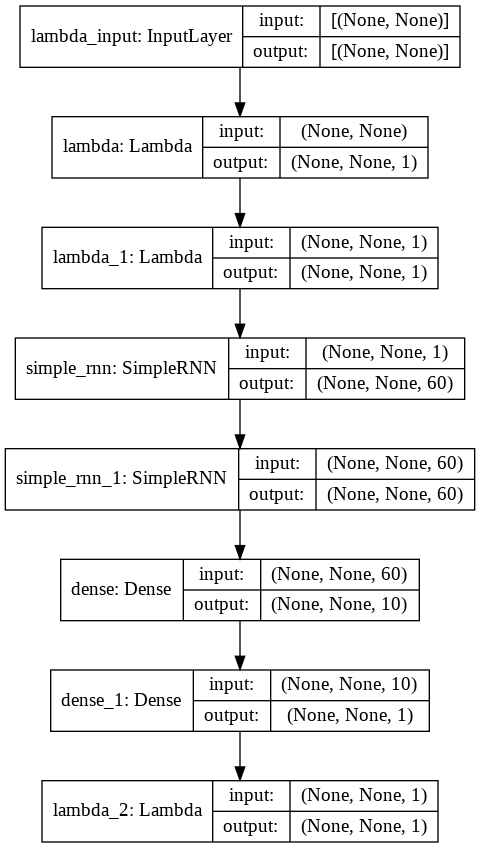

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/simpleRNN.png"
plot_model(model, to_file=to_file, show_shapes=True,)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
model.fit(dataset, epochs=20, batch_size=batch_size, verbose=1)

Epoch 1/20
68/68 [==============================] - 9s 115ms/step - loss: 15.6018 - mae: 16.0939
Epoch 2/20
68/68 [==============================] - 8s 113ms/step - loss: 8.5646 - mae: 9.0521
Epoch 3/20
68/68 [==============================] - 8s 113ms/step - loss: 8.1206 - mae: 8.6065
Epoch 4/20
68/68 [==============================] - 8s 112ms/step - loss: 7.3948 - mae: 7.8789
Epoch 5/20
68/68 [==============================] - 8s 111ms/step - loss: 7.0385 - mae: 7.5222
Epoch 6/20
68/68 [==============================] - 8s 114ms/step - loss: 6.8904 - mae: 7.3735
Epoch 7/20
68/68 [==============================] - 8s 114ms/step - loss: 6.7969 - mae: 7.2799
Epoch 8/20
68/68 [==============================] - 8s 113ms/step - loss: 6.7379 - mae: 7.2205
Epoch 9/20
68/68 [==============================] - 8s 112ms/step - loss: 6.7034 - mae: 7.1858
Epoch 10/20
68/68 [==============================] - 8s 114ms/step - loss: 6.6783 - mae: 7.1610
Epoch 11/20
68/68 [============================

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size, batch_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Saving figure simpleRNNPred


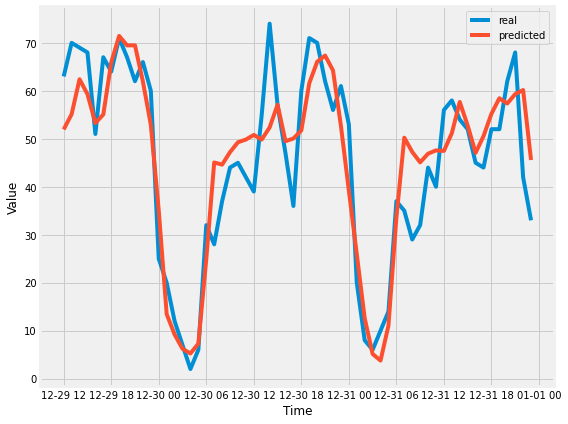

In [ ]:
plt.figure(figsize=(8, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.legend(['real', 'predicted'])
save_fig('simpleRNNPred')

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

7.108533

## Bidirectional LSTM

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1),
                        input_shape=[None]),
    # YOUR CODE HERE
    tf.keras.layers.Lambda(lambda x: tf.math.log1p(x)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(15, return_sequences=True)),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: tf.math.expm1(x)),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
lambda_1 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 120)         29760     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 60)          36240     
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 30)          9120      
_________________________________________________________________
dense (Dense)                (None, None, 1)           31        
_________________________________________________________________
lambda_2 (Lambda)            (None, None, 1)           0

/content/images


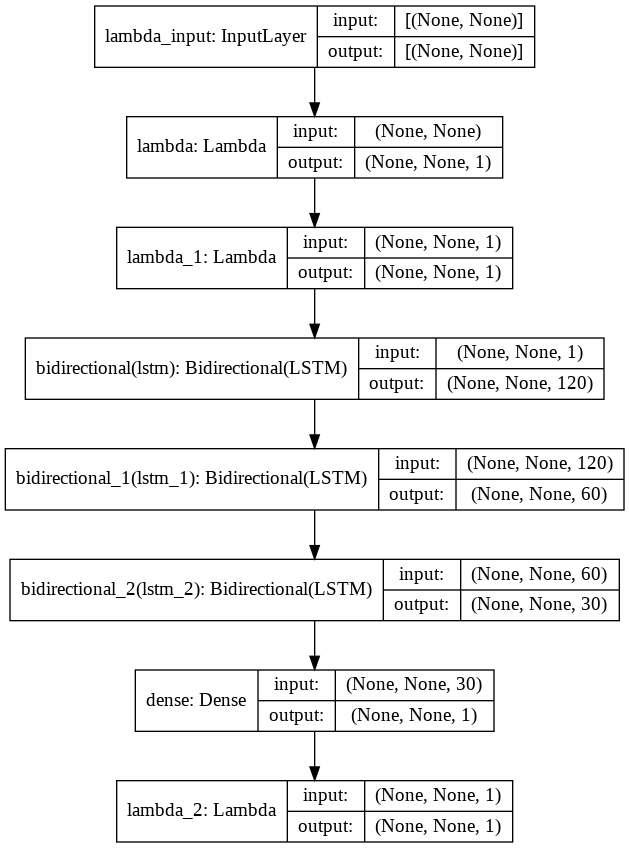

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/BidLSTM.png"
plot_model(model, to_file=to_file, show_shapes=True,)

In [ ]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
              metrics=["mae"])
history = model.fit(train_set, epochs=20, verbose=1, batch_size=batch_size)
                                                            
# FIND A MODEL AND A LR THAT TRAINS TO AN MAE < 3

Epoch 1/20
68/68 [==============================] - 13s 34ms/step - loss: 23.4163 - mae: 23.9107
Epoch 2/20
68/68 [==============================] - 2s 34ms/step - loss: 10.8266 - mae: 11.3155
Epoch 3/20
68/68 [==============================] - 2s 35ms/step - loss: 5.8278 - mae: 6.3079
Epoch 4/20
68/68 [==============================] - 3s 35ms/step - loss: 5.0004 - mae: 5.4770
Epoch 5/20
68/68 [==============================] - 2s 34ms/step - loss: 4.3236 - mae: 4.7972
Epoch 6/20
68/68 [==============================] - 3s 35ms/step - loss: 3.4466 - mae: 3.9137
Epoch 7/20
68/68 [==============================] - 3s 35ms/step - loss: 2.9187 - mae: 3.3790
Epoch 8/20
68/68 [==============================] - 3s 35ms/step - loss: 1.5171 - mae: 1.9463
Epoch 9/20
68/68 [==============================] - 3s 36ms/step - loss: 1.1486 - mae: 1.5621
Epoch 10/20
68/68 [==============================] - 3s 35ms/step - loss: 1.0334 - mae: 1.4569
Epoch 11/20
68/68 [==============================] - 2

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size, batch_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]
rnn_forecast.shape

(60,)

Saving figure BidLSTMPred


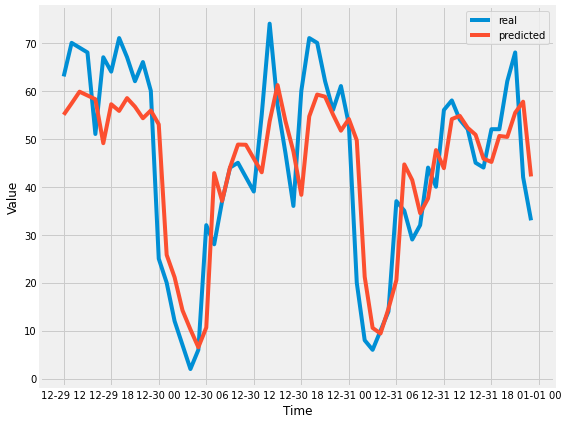

In [ ]:
plt.figure(figsize=(8, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.legend(['real', 'predicted'])
save_fig('BidLSTMPred')

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

8.86677

## Conv1D + Bidirectional

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
K.clear_session()
train_set = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [ ]:
K.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Lambda(lambda x: tf.math.log1p(x)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30, return_sequences=True)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: tf.math.expm1(x)),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lambda (Lambda)              (None, None, 60)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 120)         58080     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 120)         86880     
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 60)          36240     
_________________________________________________________________
dense (Dense)                (None, None, 1)           61        
_________________________________________________________________
lambda_1 (Lambda)            (None, None, 1)           0

/content/images


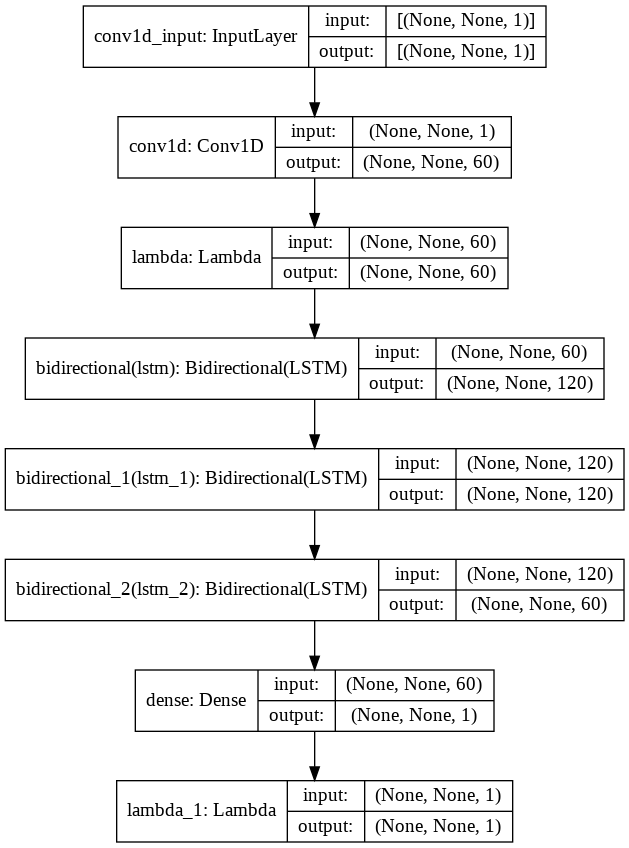

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/ConvBid.png"
plot_model(model, to_file=to_file, show_shapes=True,)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3,)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
history = model.fit(train_set, epochs=20, verbose=1, batch_size=batch_size)

Epoch 1/20
68/68 [==============================] - 35s 39ms/step - loss: 13.2785 - mae: 13.7677
Epoch 2/20
68/68 [==============================] - 3s 38ms/step - loss: 5.5264 - mae: 6.0057
Epoch 3/20
68/68 [==============================] - 3s 38ms/step - loss: 4.1061 - mae: 4.5784
Epoch 4/20
68/68 [==============================] - 3s 39ms/step - loss: 3.3651 - mae: 3.8286
Epoch 5/20
68/68 [==============================] - 3s 38ms/step - loss: 1.6986 - mae: 2.1457
Epoch 6/20
68/68 [==============================] - 3s 38ms/step - loss: 1.6030 - mae: 2.0476
Epoch 7/20
68/68 [==============================] - 3s 38ms/step - loss: 1.6105 - mae: 2.0482
Epoch 8/20
68/68 [==============================] - 3s 38ms/step - loss: 1.0423 - mae: 1.4660
Epoch 9/20
68/68 [==============================] - 3s 37ms/step - loss: 0.9139 - mae: 1.3272
Epoch 10/20
68/68 [==============================] - 3s 38ms/step - loss: 1.0528 - mae: 1.4645
Epoch 11/20
68/68 [==============================] - 3s 

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size, batch_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Saving figure ConvBidPred


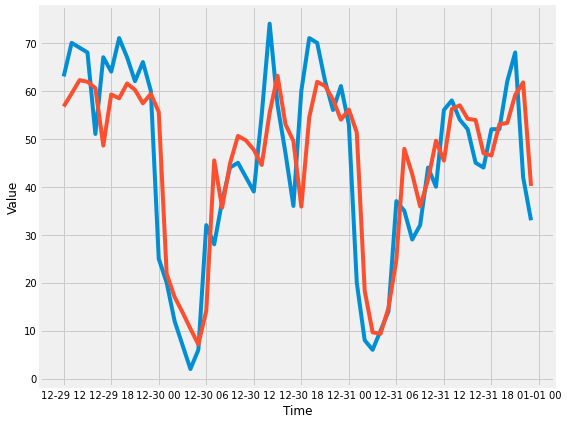

In [ ]:
plt.figure(figsize=(8, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
save_fig('ConvBidPred')

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

8.389789

## Conv1D + LSTM + Dense

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Lambda(lambda x: tf.math.log1p(x)),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: tf.math.expm1(x)),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lambda (Lambda)              (None, None, 60)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1830      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           1

/content/images


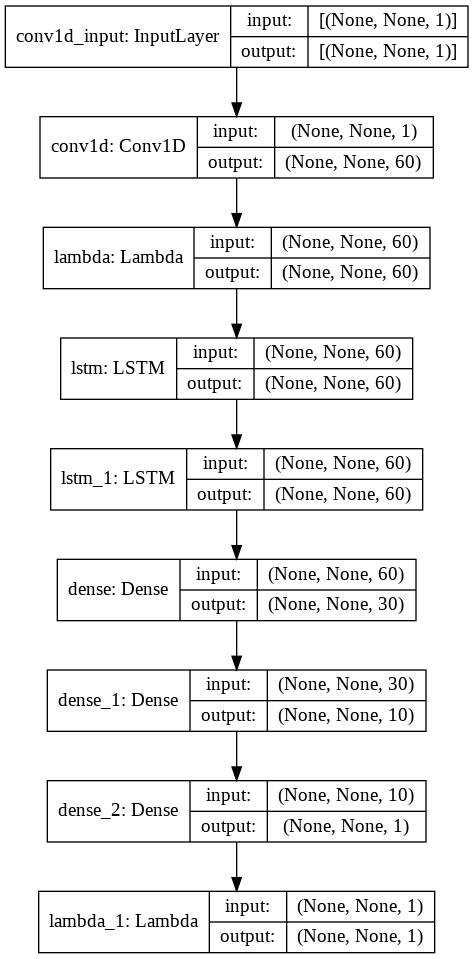

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/ConvLSTMDense.png"
plot_model(model, to_file=to_file, show_shapes=True,)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, )
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=20, batch_size=batch_size)

Epoch 1/20
68/68 [==============================] - 4s 23ms/step - loss: 22.8640 - mae: 23.3580
Epoch 2/20
68/68 [==============================] - 2s 25ms/step - loss: 8.8615 - mae: 9.3480
Epoch 3/20
68/68 [==============================] - 2s 23ms/step - loss: 7.9848 - mae: 8.4697
Epoch 4/20
68/68 [==============================] - 2s 24ms/step - loss: 7.7885 - mae: 8.2731
Epoch 5/20
68/68 [==============================] - 2s 23ms/step - loss: 7.6211 - mae: 8.1056
Epoch 6/20
68/68 [==============================] - 2s 24ms/step - loss: 7.2936 - mae: 7.7774
Epoch 7/20
68/68 [==============================] - 2s 24ms/step - loss: 6.9050 - mae: 7.3880
Epoch 8/20
68/68 [==============================] - 2s 24ms/step - loss: 6.6772 - mae: 7.1595
Epoch 9/20
68/68 [==============================] - 2s 24ms/step - loss: 6.5671 - mae: 7.0488
Epoch 10/20
68/68 [==============================] - 2s 23ms/step - loss: 6.5051 - mae: 6.9870
Epoch 11/20
68/68 [==============================] - 2s 2

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size, batch_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Saving figure ConvLSTMDensePred


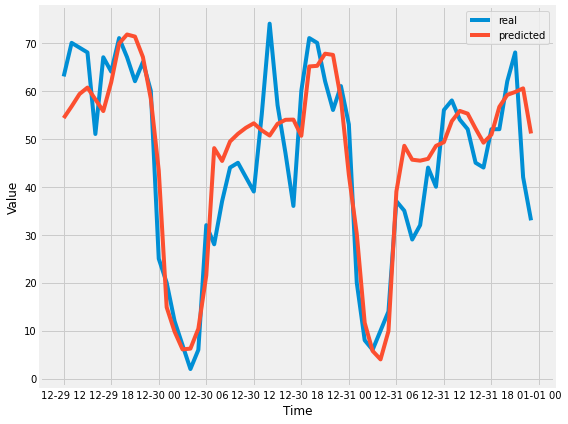

In [ ]:
plt.figure(figsize=(8, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.legend(['real', 'predicted'])
save_fig('ConvLSTMDensePred')

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

7.591506

## Conv1D LSTM Dense and Lambda

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [ ]:
model = tf.keras.models.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Conv1D(filters=60, kernel_size=5, 
                           padding='causal', activation='relu', 
                           input_shape=[None, 1]),
    tf.keras.layers.Lambda(lambda x: tf.math.log1p(x)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: tf.math.expm1(x)),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lambda (Lambda)              (None, None, 60)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 120)         58080     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 120)         86880     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 60)          43440     
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1

/content/images


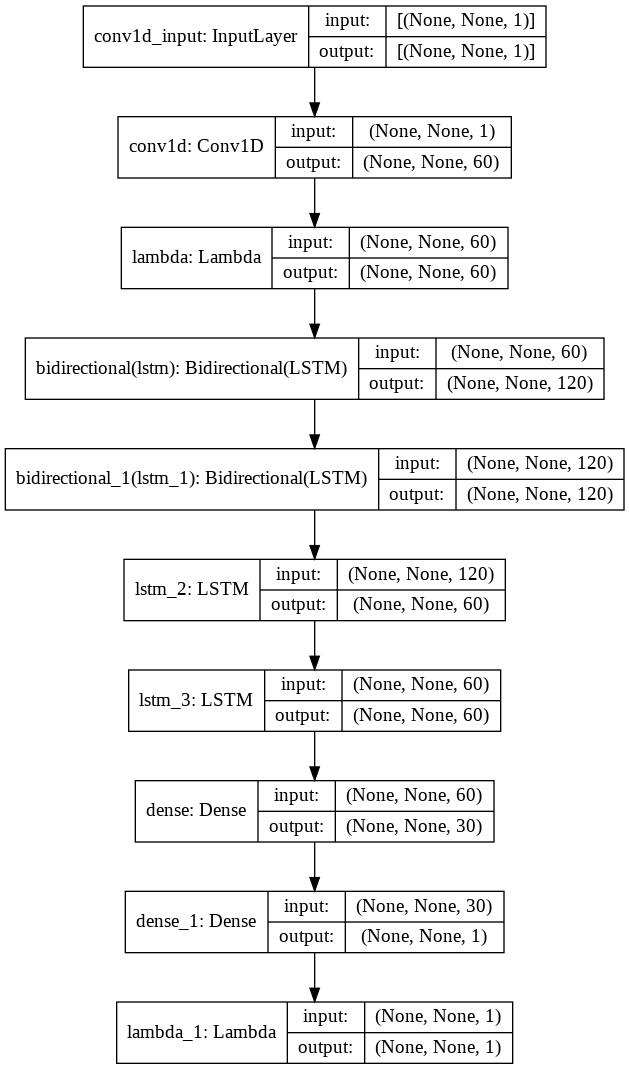

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/ConvBiLSTMDense.png"
plot_model(model, to_file=to_file, show_shapes=True,)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, )
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=20, verbose=1, batch_size=batch_size)
                                    
# EXPECTED OUTPUT SHOULD SEE AN MAE OF <2 WITHIN ABOUT 30 EPOCHS

Epoch 1/20
68/68 [==============================] - 10s 38ms/step - loss: 21.7917 - mae: 22.2852
Epoch 2/20
68/68 [==============================] - 3s 40ms/step - loss: 7.0043 - mae: 7.4880
Epoch 3/20
68/68 [==============================] - 3s 38ms/step - loss: 4.3713 - mae: 4.8449
Epoch 4/20
68/68 [==============================] - 3s 38ms/step - loss: 3.1177 - mae: 3.5820
Epoch 5/20
68/68 [==============================] - 3s 38ms/step - loss: 2.7985 - mae: 3.2569
Epoch 6/20
68/68 [==============================] - 3s 39ms/step - loss: 1.8245 - mae: 2.2593
Epoch 7/20
68/68 [==============================] - 3s 39ms/step - loss: 1.2953 - mae: 1.7159
Epoch 8/20
68/68 [==============================] - 3s 38ms/step - loss: 1.1839 - mae: 1.6051
Epoch 9/20
68/68 [==============================] - 3s 41ms/step - loss: 1.0588 - mae: 1.4689
Epoch 10/20
68/68 [==============================] - 3s 39ms/step - loss: 0.9785 - mae: 1.3841
Epoch 11/20
68/68 [==============================] - 3s 

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size, batch_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Saving figure ConvBiLSTMDensePred2


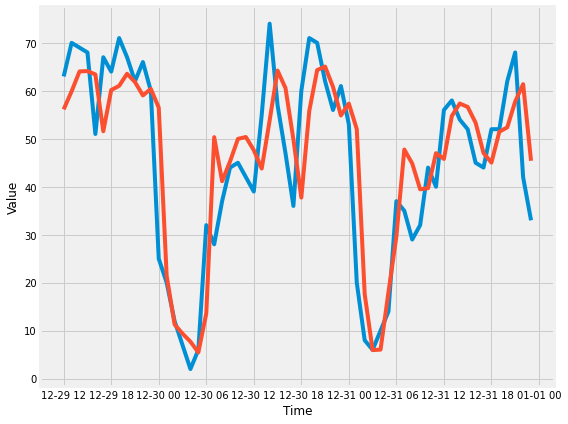

In [ ]:
plt.figure(figsize=(8, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
save_fig('ConvBiLSTMDensePred2')
# EXPECTED OUTPUT. PLOT SHOULD SHOW PROJECTIONS FOLLOWING ORIGINAL DATA CLOSELY

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

8.545535